In [2]:
#project

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/hemalii3/Food-Delivery-Profitability-Analysis-/refs/heads/main/food_orders_new_delhi%20(1).csv"
# Load the dataset
data = pd.read_csv(url)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [16]:
print(data.isnull().sum())

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64


In [17]:
data.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


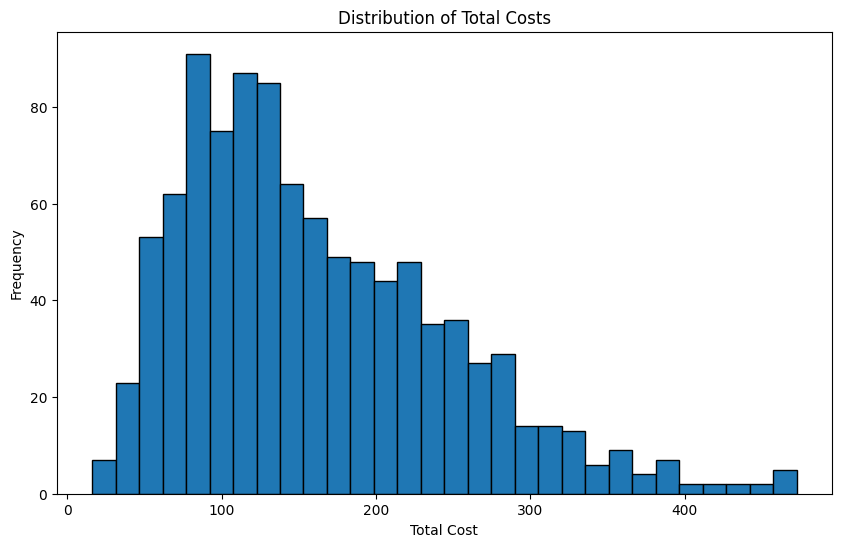

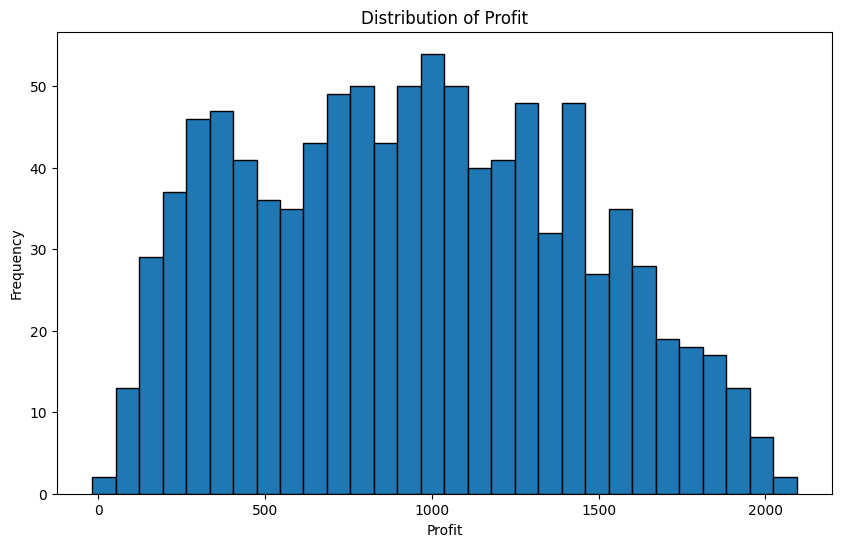

Total Revenue: $1106669.15
Total Cost: $161041.84999999998
Total Profit: $945627.3


In [18]:
# Convert 'Order Date and Time' and 'Delivery Date and Time' to datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

# Function to convert discount strings to numeric values
def convert_discount(discount, order_value):
    if pd.isnull(discount):
        return 0
    if isinstance(discount, str):
        if '%' in discount:
            # Extract the numeric part and calculate the discount
            percentage = float(discount.replace('%', '').split()[0])
            return (percentage / 100) * order_value
        elif 'off' in discount.lower():
            # Assume a fixed amount discount for simplicity
            amount = float(discount.split()[0])
            return amount
        else:
            # If there's no clear numeric part, try converting directly to float
            try:
                return float(discount)
            except ValueError:
                return 0
    return discount

# Apply the conversion function to the 'Discounts and Offers' column
data['Discounts and Offers'] = data.apply(
    lambda row: convert_discount(row['Discounts and Offers'], row['Order Value']), axis=1
)

# Ensure all NaNs are filled with 0
data['Discounts and Offers'] = data['Discounts and Offers'].fillna(0).astype(float)

# Convert other relevant columns to numeric types and fill NaNs with 0
numeric_columns = ['Delivery Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce').fillna(0).astype(float)

# Calculate total costs and revenue
data['Total Cost'] = data['Delivery Fee'] + data['Discounts and Offers'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks']
data['Revenue'] = data['Order Value'] - data['Discounts and Offers'] + data['Commission Fee']

# Plot total costs
plt.figure(figsize=(10, 6))
data['Total Cost'].plot(kind='hist', bins=30, edgecolor='k')
plt.title('Distribution of Total Costs')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

# Calculate profitability
data['Profit'] = data['Revenue'] - data['Total Cost']

# Plot profitability
plt.figure(figsize=(10, 6))
data['Profit'].plot(kind='hist', bins=30, edgecolor='k')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Overall profitability
total_revenue = data['Revenue'].sum()
total_cost = data['Total Cost'].sum()
total_profit = data['Profit'].sum()

print(f"Total Revenue: ${total_revenue}")
print(f"Total Cost: ${total_cost}")
print(f"Total Profit: ${total_profit}")

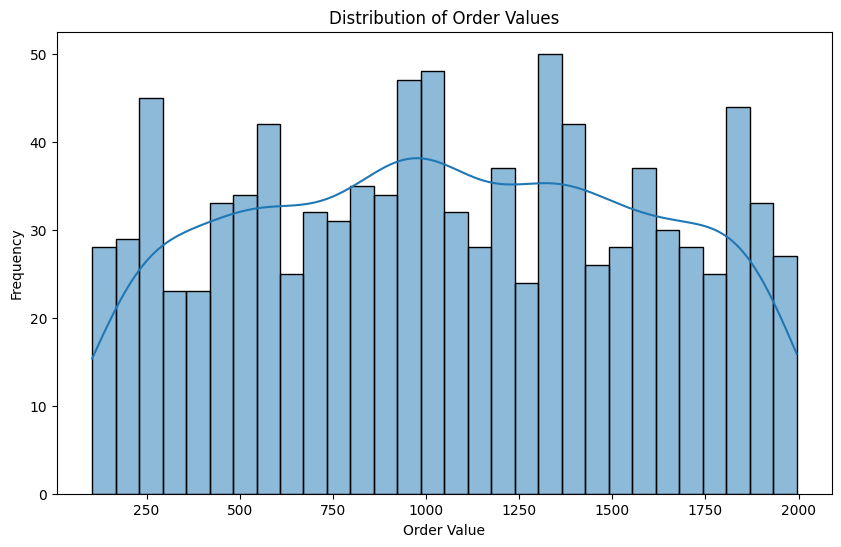

In [19]:
# Distribution of order values
plt.figure(figsize=(10, 6))
sns.histplot(data['Order Value'], bins=30, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

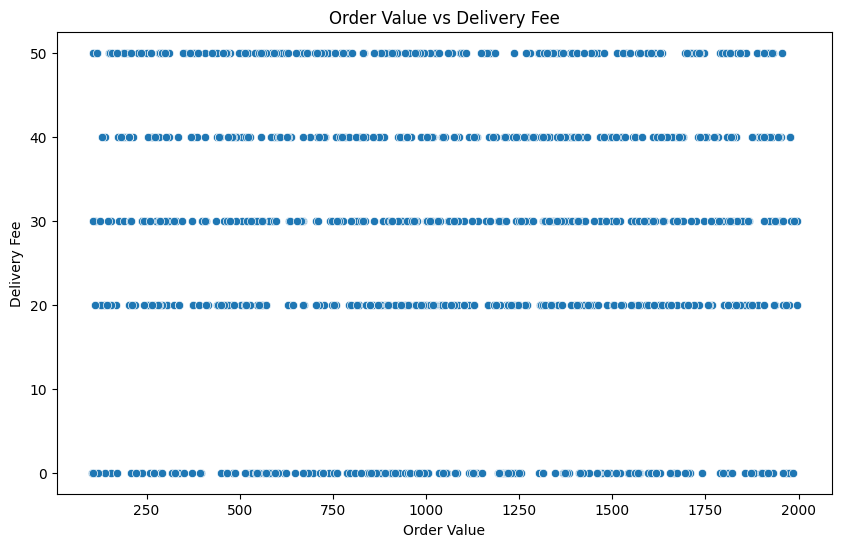

In [20]:
# Relationship between order value and delivery fee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Value', y='Delivery Fee', data=data)
plt.title('Order Value vs Delivery Fee')
plt.xlabel('Order Value')
plt.ylabel('Delivery Fee')
plt.show()


In [21]:
# Convert necessary columns to numeric (in case they were strings)
cols_to_convert = [
    'Order Value', 'Discounts and Offers', 'Commission Fee',
    'Delivery Fee', 'Payment Processing Fee', 'Refunds/Chargebacks'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Create a synthetic 'Total Cost' column
data['Total Cost'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks']

# Define the simulation function
def simulate_profit_adjustment(data, commission_increase):
    data['Adjusted Commission Fee'] = data['Commission Fee'] * (1 + commission_increase)
    data['Adjusted Revenue'] = data['Order Value'] - data['Discounts and Offers'] + data['Adjusted Commission Fee']
    data['Adjusted Profit'] = data['Adjusted Revenue'] - data['Total Cost']
    
    adjusted_total_revenue = data['Adjusted Revenue'].sum()
    adjusted_total_profit = data['Adjusted Profit'].sum()
    
    return adjusted_total_revenue, adjusted_total_profit

# Run the simulation
commission_increase = 0.10  # 10% increase in commission
adjusted_total_revenue, adjusted_total_profit = simulate_profit_adjustment(data, commission_increase)

# Print results
print(f"Adjusted Total Revenue (10% increase in commission): ${adjusted_total_revenue:.2f}")
print(f"Adjusted Total Profit (10% increase in commission): ${adjusted_total_profit:.2f}")


Adjusted Total Revenue (10% increase in commission): $1119368.15
Adjusted Total Profit (10% increase in commission): $1032616.15


In [22]:

#1. 📉 What if discounts are reduced by 20%?
def simulate_discount_reduction(data, discount_reduction):
    data['Reduced Discounts'] = data['Discounts and Offers'] * (1 - discount_reduction)
    data['Revenue with Reduced Discounts'] = data['Order Value'] - data['Reduced Discounts'] + data['Commission Fee']
    data['Profit with Reduced Discounts'] = data['Revenue with Reduced Discounts'] - data['Payment Processing Fee'] - data['Refunds/Chargebacks']
    
    total_rev = data['Revenue with Reduced Discounts'].sum()
    total_profit = data['Profit with Reduced Discounts'].sum()
    return total_rev, total_profit

reduced_discount_rev, reduced_discount_profit = simulate_discount_reduction(data.copy(), 0.20)
print(f"Revenue with 20% Discount Reduction: ${reduced_discount_rev:.2f}")
print(f"Profit with 20% Discount Reduction: ${reduced_discount_profit:.2f}")


Revenue with 20% Discount Reduction: $1121527.12
Profit with 20% Discount Reduction: $1063395.12


In [23]:
#2. 🚚 What if delivery fees increase by ₹20 per order?
def simulate_delivery_fee_increase(data, fee_increase):
    data['Increased Delivery Fee'] = data['Delivery Fee'] + fee_increase
    data['Revenue with Increased Delivery'] = data['Order Value'] - data['Discounts and Offers'] + data['Commission Fee'] + fee_increase
    data['Profit with Increased Delivery'] = data['Revenue with Increased Delivery'] - data['Payment Processing Fee'] - data['Refunds/Chargebacks']
    
    return data['Revenue with Increased Delivery'].sum(), data['Profit with Increased Delivery'].sum()

inc_delivery_rev, inc_delivery_profit = simulate_delivery_fee_increase(data.copy(), 20)
print(f"Revenue with ₹20 Increased Delivery Fee: ${inc_delivery_rev:.2f}")
print(f"Profit with ₹20 Increased Delivery Fee: ${inc_delivery_profit:.2f}")




Revenue with ₹20 Increased Delivery Fee: $1126669.15
Profit with ₹20 Increased Delivery Fee: $1068537.15


In [24]:
#3. 📈 Breakeven Commission Increase (Max Profit without hurting users)
def find_best_commission_increase(data, steps=20):
    results = []
    for rate in [x/100 for x in range(0, steps + 1)]:  # 0% to 20%
        temp = data.copy()
        temp['Adjusted Commission'] = temp['Commission Fee'] * (1 + rate)
        temp['Adj Revenue'] = temp['Order Value'] - temp['Discounts and Offers'] + temp['Adjusted Commission']
        temp['Adj Profit'] = temp['Adj Revenue'] - temp['Payment Processing Fee'] - temp['Refunds/Chargebacks']
        total_profit = temp['Adj Profit'].sum()
        results.append((rate, total_profit))
    
    best_rate, best_profit = max(results, key=lambda x: x[1])
    return best_rate, best_profit

best_commission_rate, max_profit = find_best_commission_increase(data)
print(f"Optimal Commission Increase: {best_commission_rate*100:.2f}%")
print(f"Max Profit at this rate: ${max_profit:.2f}")


Optimal Commission Increase: 20.00%
Max Profit at this rate: $1073935.15


In [25]:
#4. 🧾 Segment-wise Profit Analysis (by Payment Method / Restaurant ID)
# Profit by Payment Method
data['Net Profit'] = data['Adjusted Revenue'] - data['Payment Processing Fee'] - data['Refunds/Chargebacks']
payment_method_profit = data.groupby('Payment Method')['Net Profit'].sum().sort_values(ascending=False)
print(payment_method_profit)

# Profit by Restaurant
restaurant_profit = data.groupby('Restaurant ID')['Net Profit'].sum().sort_values(ascending=False).head(10)
print(restaurant_profit)


Payment Method
Cash on Delivery    374246.70
Credit Card         362911.60
Digital Wallet      324077.85
Name: Net Profit, dtype: float64
Restaurant ID
R2726    6725.10
R2083    6255.15
R2933    5712.15
R2329    5342.70
R2804    5155.70
R2355    5089.95
R2523    4940.05
R2317    4874.05
R2222    4861.70
R2006    4811.85
Name: Net Profit, dtype: float64


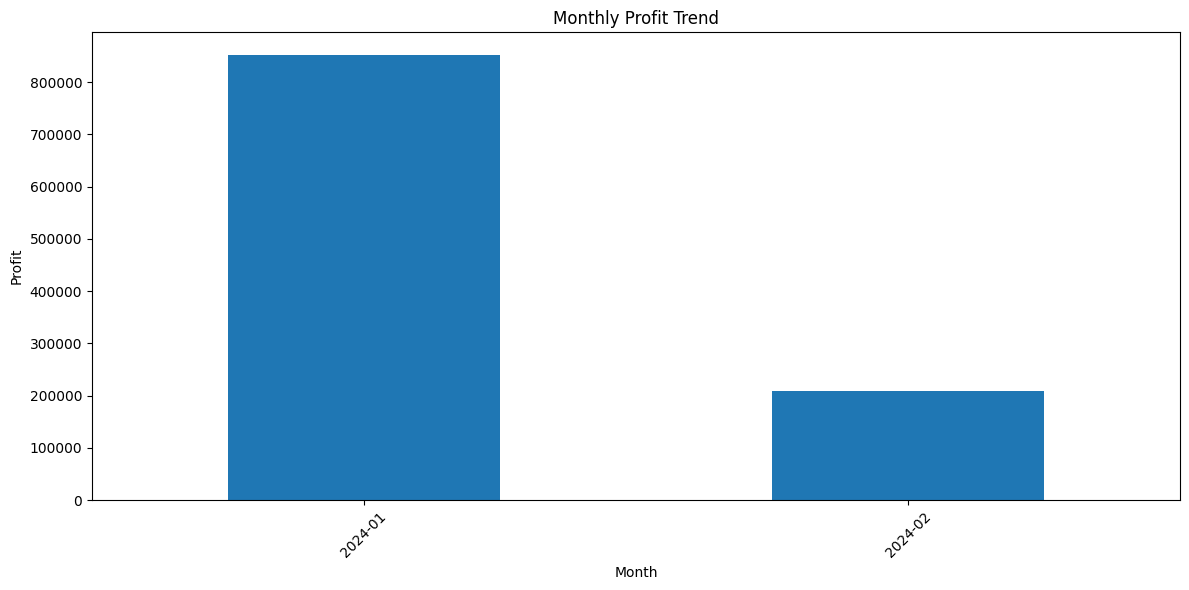

In [26]:
#5. 📆 Time-Based Profit Trend (Month-over-Month)
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Month'] = data['Order Date and Time'].dt.to_period('M')
monthly_profit = data.groupby('Month')['Net Profit'].sum()

import matplotlib.pyplot as plt
monthly_profit.plot(kind='bar', figsize=(12, 6), title="Monthly Profit Trend")
plt.ylabel("Profit")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
